<a href="https://colab.research.google.com/github/asimham/xtern/blob/main/xtern_DataScience_WSA_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis is written at the End, Please go through all the comments mentioned in each cell for a brief understanding and the data analysis at the end will provide a clear and a better idea about the approach.

XTERN, DATA SCIENCE WORK SAMPLE ASSESSMENT, October-2022

In [217]:
#importing all the necessary packages
import pandas as pd, numpy as np
import requests
import json
import time
import folium
import time, re
import matplotlib.pyplot as plt

In [2]:
#initializing Spark on Google Colab
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.3.0-bin-hadoop3"
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [282]:
#entering the co-ordinates of Indy,the keywords to search and the radius of the search
coordinates = ['39.791000, -86.148003']
keywords = ['restaurants','coffee shops','costco','kroger','movies','attractions','parks','zoo','malls','pharmacy','grocery','indian food','gas stations','chinese','chocolates','bar','night club','lakes','parks','monuments','banks','notable buildings','local restaurants','chain restaurants','fast food','saloon','star hotels','iupui','hospitals','research centers','places of worship','bakery','winery','bar and grill','McDonalds','Tacobell','burger king','arbys','chipotle','pizza','pancakes','entertainments','university health','walmart','dental clinics','historic','government offices','ice cream','italian food','mexican','steak house','biryani','international markets','stadium','convenience stores','swimming','gift shops','gallery','museum',]
radius = '5000'
business_status='operational'
api_key = 'API_KEY'#Please Enter your API KEY here.

59


In [ ]:
#data collection and cleaning
final_data=[]
next_page_token=""
for coordinate in coordinates:
    for keyword in keywords:
      #this URL would run for every keyword available in the list
        url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?location='+coordinate+'&radius='+str(radius)+'&keyword='+str(keyword)+'&key='+str(api_key)
        response = requests.get(url)
        jsondata = json.loads(response.text)
        results = jsondata['results']
        print(results)
        for result in results:
            name = result['name']#name of the place
            place_id = result ['place_id']#ID of the place
            lat = result['geometry']['location']['lat']#latitude of the location
            lng = result['geometry']['location']['lng']#longitude of the location
            rating = result['rating']#rating available(out of 5)
            types=result['types'][0]#type of establishment
            user_ratings=result['user_ratings_total']#total user ratings available
            vicinity = result['vicinity']#address of the location
            data = [name, place_id, lat, lng, types, rating ,user_ratings,vicinity]
            final_data.append(data)


    if 'next_page_token' not in jsondata:
        break
    else:
        next_page_token = jsondata['next_page_token']
url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?key='+str(api_key)+'&pagetoken='+str(next_page_token)#this will iterate for all possible search results
labels = ['place_name','Place ID', 'Latitude', 'Longitude', 'types','star_rating','ratings','vicinity']#ceating the labels for all the entitites 

In [ ]:
final_data # checking the data frame

In [27]:
#converting the data into a data frame
data_new= pd.DataFrame.from_records(final_data, columns=labels)
data_new.to_csv('data_new.csv')

In [28]:
#reading the data from the csv file
dataframe=pd.read_csv('data_new.csv')

In [319]:
dataframe#checking the data

,Unnamed: 0,place_name,Place ID,Latitude,Longitude,types,star_rating,ratings,vicinity
0,0,Sauce on the Side®,ChIJGckms2BRa4gRUFHURJspVy0,39.764600,-86.156714,meal_delivery,4.8,236,"130 S Pennsylvania St Suite 2, Indianapolis"
1,1,1313 Eatery,ChIJifR9sOdRa4gR0EF4T404LIo,39.785175,-86.101852,restaurant,4.2,151,"1313 N Sherman Dr, Indianapolis"
2,2,Kuma's Corner,ChIJ5-HjWn9aa4gRndJScIm-TUo,39.752180,-86.138780,bar,4.7,3122,"1127 Prospect St, Indianapolis"
3,3,Bakersfield,ChIJ37cxAMxRa4gRbTPVUh29Rzo,39.771958,-86.153551,bar,4.5,2379,"334 Massachusetts Ave, Indianapolis"
4,4,Harry & Izzy's,ChIJc5jIp7xQa4gRyBw22V5K24k,39.764575,-86.159660,restaurant,4.7,2962,"153 S Illinois St, Indianapolis"
5,5,Yard House,ChIJUYeec71Qa4gRyRvSkhRsUxo,39.765328,-86.159140,bar,4.4,2765,"15 W Maryland St, Indianapolis"
6,6,Bru Burger Bar,ChIJEc2YIJVQa4gRGeKM71Blwm0,39.773332,-86.152135,bar,4.5,4536,"410 Massachusetts Ave, Indianapolis"
7,7,Weber Grill Restaurant,ChIJQ6Dh9LtQa4gRCsuBQTc7IPw,39.767605,-86.160065,bar,4.2,2510,"10 N Illinois St, Indianapolis"
8,8,Season's Restaurant,ChIJGYDMk75Qa4gRw5T9kLrYjGA,39.769633,-86.158619,restaurant,4.0,6,"31 W Ohio St, Indianapolis"
9,9,Mesh - Indianapolis,ChIJF7ujvO1Qa4gRvr9-aFMpudc,39.776775,-86.146247,bar,4.4,1275,"725 Massachusetts Ave, Indianapolis"


In [31]:
#cleaning the available data by eliminiating unnecessary rows
local_business=dataframe[['place_name','types','vicinity','star_rating','ratings']].copy()

In [ ]:
local_business

In [ ]:
#printing the new csv file
import pandas as pd
pd.options.display.max_rows = 9999
df = pd.read_csv('data_new.csv')
print(df) 

In [38]:
local_business.to_csv('cleaned_data_new.csv')

In [ ]:
#printing the cleaned CSV file
import pandas as pd
pd.options.display.max_rows = 9999
df = pd.read_csv('cleaned_data_new.csv')

print(df) 

In [40]:
#extracting the data from the clean CSV file into Spark SQL environment
df_csv=spark.read.csv('/content/cleaned_data_new.csv', header=True)
df_csv.show()

+---+--------------------+-------------+--------------------+-----------+-------+
|_c0|          place_name|        types|            vicinity|star_rating|ratings|
+---+--------------------+-------------+--------------------+-----------+-------+
|  0|  Sauce on the Side®|meal_delivery|130 S Pennsylvani...|        4.8|    236|
|  1|         1313 Eatery|   restaurant|1313 N Sherman Dr...|        4.2|    151|
|  2|       Kuma's Corner|          bar|1127 Prospect St,...|        4.7|   3122|
|  3|         Bakersfield|          bar|334 Massachusetts...|        4.5|   2379|
|  4|      Harry & Izzy's|   restaurant|153 S Illinois St...|        4.7|   2962|
|  5|          Yard House|          bar|15 W Maryland St,...|        4.4|   2765|
|  6|      Bru Burger Bar|          bar|410 Massachusetts...|        4.5|   4536|
|  7|Weber Grill Resta...|          bar|10 N Illinois St,...|        4.2|   2510|
|  8| Season's Restaurant|   restaurant|31 W Ohio St, Ind...|        4.0|      6|
|  9| Mesh - Ind

In [41]:
#counting the number of available rows in the table
count=df_csv.count()
print("the total number of entries are "+ str(count))

the total number of entries are 831


In [42]:
#converting the csv into an RDD
csvRDD=df_csv.rdd

In [43]:
df_csv.groupBy("types").count().orderBy("count",ascending=False)

DataFrame[types: string, count: bigint]

In [44]:
#creating a temporarcy view called xtern, all SQL operations will be done on this temporary view.
df_csv.createOrReplaceTempView("xtern")

In [55]:
#Query-1- This query will let us know the number of branches/outlets avaialbe for each brand in the city
spark.sql("select place_name, types, count(*) as total_outlets from xtern group by place_name, types order by count(*) desc ").show()

+--------------------+--------------------+-------------+
|          place_name|               types|total_outlets|
+--------------------+--------------------+-------------+
|          McDonald's|                cafe|            8|
|              Kroger|grocery_or_superm...|            8|
|           Taco Bell|       meal_takeaway|            7|
|        White Castle|          restaurant|            7|
|            Hardee's|          restaurant|            6|
|             Wendy's|          restaurant|            6|
|               Shell|         gas_station|            6|
|                  bp|         gas_station|            4|
|        CVS Pharmacy|            pharmacy|            4|
|            Bazbeaux|       meal_takeaway|            4|
|           Starbucks|                cafe|            4|
|              Arby's|       meal_takeaway|            4|
|Indiana War Memor...|  tourist_attraction|            4|
|             Rally's|          restaurant|            4|
|Oldfields–Lil

In [83]:
#Query-2. This quey will return all parks,touristic spots that are open to the public in the city, they are sorted based on the star rating given by the public on Google.
spark.sql("select distinct place_name,vicinity as address ,star_rating from xtern where place_name like '%Park%' and star_rating>3.5 and types in('park','tourist_attraction') order by star_rating desc").show()

+--------------------+--------------------+-----------+
|          place_name|             address|star_rating|
+--------------------+--------------------+-----------+
| Chinquapin Oak Park|2319 Nowland Ave,...|        5.0|
|       Triangle Park|Sterling St, Indi...|        4.8|
|White River State...|801 W Washington ...|        4.7|
|Virginia B. Fairb...|1850 W 38th St, I...|        4.7|
|    Frank Young Park|1000 Udell St, In...|        4.5|
|       Highland Park|1100 E New York S...|        4.5|
|    Bertha Ross Park|3700 Clifton St, ...|        4.4|
|Edna Balz Lacy Fa...|700 Greer St, Ind...|        4.4|
|George E. Kessler...|2501 N Pennsylvan...|        4.4|
|Oscar Charleston ...|2800 E 30th St, I...|        4.3|
|         Spades Park|1800 Nowland Ave,...|        4.3|
|          Pride Park|1129 Vandeman St,...|        4.2|
|          Stacy Park|1503 Hoyt Ave, In...|        4.2|
|      Hawthorne Park|75 N Belleview Pl...|        4.1|
|        Willard Park|1901 E Washington...|     

In [143]:
#Query-3 This query returns all the cafes and bakeries in the city. The result shown is the top 10 values.
spark.sql("select place_name, vicinity as address,star_rating from xtern where types in ('cafe','bakery') order by star_rating desc limit 10 ").show()

+--------------------+--------------------+-----------+
|          place_name|             address|star_rating|
+--------------------+--------------------+-----------+
|     Our Sons Bakery|609 E 29th St Sui...|        5.0|
|       Red Door Cafe|237 N East St, In...|        5.0|
|      4 Birds Bakery|607 Fulton St, In...|        5.0|
|Zoë's World of Cakes|2442 Central Ave,...|        5.0|
|              YUMMY!|609 E 29th St, In...|        5.0|
|Georgia Street Grind|1001, 25 W Georgi...|        4.9|
|Amelia's Windsor ...|1637 Nowland Ave,...|        4.8|
|Amelia's Windsor ...|1637 Nowland Ave,...|        4.8|
|Amelia's Fletcher...|653 Virginia Ave,...|        4.8|
| Leviathan Bakehouse|1101 N College Av...|        4.8|
+--------------------+--------------------+-----------+



In [87]:
#Query-3 This query lets us know the skeleton of the table 'xtern' and the data types of the entites inside the table.
spark.sql("desc xtern").show()

+-----------+---------+-------+
|   col_name|data_type|comment|
+-----------+---------+-------+
|        _c0|   string|   null|
| place_name|   string|   null|
|      types|   string|   null|
|   vicinity|   string|   null|
|star_rating|   string|   null|
|    ratings|   string|   null|
+-----------+---------+-------+



In [298]:
#Query-4: This query results in the Top 10 places that should be visited in the city, this is based on the criteria that the ratings are atleast 100 or more.
spark.sql("select place_name, types, star_rating,ratings,vicinity as address from xtern where star_rating <>0 and ratings >100 group by place_name, vicinity, types,star_rating,ratings order by ratings asc limit 10 ").show()

+--------------------+-------------+-----------+-------+--------------------+
|          place_name|        types|star_rating|ratings|             address|
+--------------------+-------------+-----------+-------+--------------------+
|  Circle Centre Mall|shopping_mall|        4.1|  10067|49 W Maryland St,...|
|      A&W Restaurant|   restaurant|        4.0|    101|49 W Maryland St,...|
|         Burger King|   restaurant|        3.5|   1013|410 E Morris St, ...|
|         First Watch|   restaurant|        4.5|   1016|143 N Illinois St...|
|  QDOBA Mexican Eats|          bar|        4.0|   1035|907 Indiana Ave S...|
|Loughmiller's Pub...|          bar|        4.3|   1038|301 W Washington ...|
|           Ralston's|   restaurant|        4.4|   1064|635 Massachusetts...|
|La Margarita Foun...|   restaurant|        4.4|   1079|1043 Virginia Ave...|
|White Rabbit Cabaret|   night_club|        4.5|    109|1116 Prospect St,...|
|      Ritz Nightclub|   night_club|        4.0|    110|2628 N H

In [299]:
#Query-5: This query returns us a list of places to visit in the morning , For example, these place might be in the category of museum, galleries, stadiums, zoo etc.
spark.sql("select place_name , types, vicinity as address,star_rating from xtern where types in ('art_gallery','zoo','museum','natural_feature','tourist_attraction','stadium' ) and star_rating<> 0 order by  types asc ").show(50)

+--------------------+------------------+--------------------+-----------+
|          place_name|             types|             address|star_rating|
+--------------------+------------------+--------------------+-----------+
|Homespun: Modern ...|       art_gallery|869 Massachusetts...|        4.8|
|The Murphy Art Ce...|       art_gallery|1043 Virginia Ave...|        4.8|
|           RE:PUBLIC|       art_gallery|2301 E 10th St, I...|        4.7|
|  Long-Sharp Gallery|       art_gallery|1 N Illinois St s...|        4.9|
|         201 Studios|       art_gallery|Newton Ave, India...|        4.6|
|    Lost Dog Gallery|       art_gallery|1040 E New York S...|        5.0|
|      Vining Gallery|       art_gallery|2620 E 10th St, I...|        5.0|
|     Fine Estate Art|       art_gallery|2158 N Talbott St...|        5.0|
|     CityWay Gallery|       art_gallery|216 E South St, I...|        3.6|
|         Gallery Two|       art_gallery|1332 N Illinois S...|        4.0|
|Full Circle Nine ...|   

In [300]:
#Query-6: this query returns us the best shopping malls available in the city to do good shopping.
spark.sql("select place_name, vicinity as address ,ratings from xtern where types='shopping_mall' and ratings>10 order by star_rating").show()

+--------------------+--------------------+-------+
|          place_name|             address|ratings|
+--------------------+--------------------+-------+
|   Michigan & Holmes|2630 W Michigan S...|    294|
|      Linwood Square|4401 E 10th St, I...|   2367|
|  Circle Centre Mall|49 W Maryland St,...|  10067|
|Shops at Avondale...|        Indianapolis|    354|
|   West Side Shoppes|W 10th St, Indian...|    408|
|SHE. EVENT INDY C...|CIRCLE CENTRE MAL...|     59|
+--------------------+--------------------+-------+



In [301]:
#Query-7: This query lets us know the banks and their addresses in the city
spark.sql("select place_name , vicinity as address, star_rating from xtern where types in ('bank') order by star_rating desc limit 10").show()

+--------------------+--------------------+-----------+
|          place_name|             address|star_rating|
+--------------------+--------------------+-----------+
|     BMO Harris Bank|135 N Pennsylvani...|        4.8|
|   Old National Bank|1 Monument Cir St...|        4.4|
|        Horizon Bank|302 Alabama St, I...|        4.3|
|The National Bank...|320 N Meridian St...|        4.2|
|Fifth Third Bank ...|251 N Illinois St...|        4.1|
|            PNC Bank|4355 E 10th St, I...|        3.6|
|Fifth Third Bank ...|101 E 38th St, In...|        3.6|
|        Regions Bank|211 N Pennsylvani...|        3.4|
|First Financial Bank|11 S Meridian St ...|        3.4|
|The National Bank...|107 N Pennsylvani...|        3.3|
+--------------------+--------------------+-----------+



In [302]:
#Query-8 : This query results in a table that has all medical related locations like hospitals, pharmacies etc , This can be helpful in case of any health emergency.
spark.sql("select place_name, types, vicinity as address from xtern where types in ('hospital','pharmacy','dentist','doctor') order by ratings desc").show()

+--------------------+--------+--------------------+
|          place_name|   types|             address|
+--------------------+--------+--------------------+
|Eskenazi Health P...|pharmacy|720 Eskenazi Ave,...|
|My Indy Dental Ce...| dentist|3804 N Delaware S...|
|        CVS Pharmacy|pharmacy|3808 E Washington...|
|  Walgreens Pharmacy|pharmacy|1530 N Meridian S...|
|HealthNet Southwe...|hospital|1522 W Morris St,...|
|Indiana Dental Ce...| dentist|3628 N Sherman Dr...|
|Needler's Fresh M...|pharmacy|320 N New Jersey ...|
|HealthNet People'...|hospital|2340 E 10th St, I...|
|      Westend Dental| dentist|3636 E 38th St, I...|
|IU Health Neurosc...|hospital|362 W 15th St, In...|
|IU Health Neurosc...|hospital|362 W 15th St, In...|
|Eskenazi Health C...|hospital|1650 N College Av...|
|Simply Smile Dent...| dentist|3750 N Meridian S...|
|IU Health Methodi...|hospital|1701 N Senate Ave...|
|IU Health Methodi...|hospital|1701 N Senate Ave...|
|Sidney & Lois Esk...|hospital|720 Eskenazi Av

In [303]:
#Query-9: The query here will help us in identifying the locations of all the available grocery stores and supermarkets available in the city.
spark.sql("select distinct place_name ,vicinity as address from xtern where types in ('grocery_or_supermarket','supermarket')").show()

+--------------------+--------------------+
|          place_name|             address|
+--------------------+--------------------+
|Cleo's Bodega Gro...|2432 Doctor M.L.K...|
|          Save A Lot|2930 E 38th St, I...|
|              Kroger|227 W Michigan St...|
|    Food Stop Market|3432 E 10th St, I...|
|       Winter market|1125 E Brookside ...|
|           DG Market|2710 W 16th St, I...|
|  Whole Foods Market|320 E Market St, ...|
|TRINITY CARIBBEAN...|2439 W 16th St, I...|
|Eskenazi Health F...|704 Eskenazi Ave,...|
|              Kroger|4445 E 10th St, I...|
|              Kroger|680 Twin Aire Dr,...|
|              Kroger|524 E 16th St, In...|
|N&Yf food market inc|730 S State Ave, ...|
|              Kroger|2630 W Michigan S...|
|Amberson Coffee &...|401 S College Ave...|
|Needler's Fresh M...|320 N New Jersey ...|
|          Save A Lot|3739 E Washington...|
|Supermercado Carn...|2401 W Washington...|
|     Wildwood Market|1015 Virginia Ave...|
|             Safeway|2435 N She

In [304]:
#query-10: This query would result in the availability of all fastfood reataurants and takeaways in the city
spark.sql("select distinct place_name, star_rating, ratings, vicinity as address from xtern where types in('meal_takeaway','meal_delivery' ) order by ratings asc ").show()

+--------------------+-----------+-------+--------------------+
|          place_name|star_rating|ratings|             address|
+--------------------+-----------+-------+--------------------+
|           Taco Bell|        3.1|   1135|2809 E 38th St, I...|
|              Arby's|        4.0|   1235|45 E South St, In...|
|           Five Guys|        4.3|   1358|48 E Washington S...|
|           Taco Bell|        3.1|   1421|951 Indiana Ave, ...|
|          Giordano's|        4.3|   1642|43 N Illinois St,...|
|       Condado Tacos|        4.4|   1823|530 Massachusetts...|
|        P.F. Chang's|        3.9|   1823|49 W Maryland St ...|
|           Taco Bell|        3.4|   1826|3350 E Washington...|
|            Bazbeaux|        4.5|   2037|333 Massachusetts...|
|  Sauce on the Side®|        4.8|    236|130 S Pennsylvani...|
|        Happy Garden|        3.6|    245|4401 E 10th St, I...|
|       China King II|        4.0|    253|19 E 38th St, Ind...|
|          Yard House|        4.4|   276

In [305]:
#Query-11 These are the best lodging facilities availabilities in the town.
spark.sql("select place_name, vicinity as address, star_rating from xtern where types in('lodging') and star_rating<> 0 order by star_rating desc ").show()

+--------------------+--------------------+-----------+
|          place_name|             address|star_rating|
+--------------------+--------------------+-----------+
|Piccadilly Penthouse|28 E 16th St, Ind...|        4.9|
|   Bottleworks Hotel|850 Massachusetts...|        4.8|
| Conrad Indianapolis|50 W Washington S...|        4.6|
|JW Marriott India...|10 S West St, Ind...|        4.5|
|Candlewood Suites...|1152 N White Rive...|        4.4|
|Le Méridien India...|123 S Illinois St...|        4.4|
|Staybridge Suites...|535 S West St, In...|        4.4|
|       The Alexander|333 Delaware St, ...|        4.4|
|Hotel Indy, India...|141 E Washington ...|        4.4|
|Homewood Suites b...|211 S Meridian St...|        4.4|
|Holiday Inn Expre...|410 S Missouri St...|        4.3|
|The Westin Indian...|241 W Washington ...|        4.3|
|Hyatt Regency Ind...|1 S Capitol Ave, ...|        4.3|
|Crowne Plaza Indi...|123 W Louisiana S...|        4.2|
|  Omni Severin Hotel|40 W Jackson Pl, ...|     

In [306]:
#Query-12 This query would result in all the available movie theaters around the downtown area.
spark.sql("select place_name,vicinity as address,star_rating from xtern where types like'%movie%' limit 5").show()

+--------------------+--------------------+-----------+
|          place_name|             address|star_rating|
+--------------------+--------------------+-----------+
|Regal UA Circle C...|49 W Maryland St ...|        4.3|
|Kan-Kan Cinema an...|1258 Windsor St, ...|        4.9|
|Living Room Theaters|745 E 9th St Suit...|        4.6|
|IMAX Theatre in t...|650 W Washington ...|        4.7|
|              Redbox|524 E 16th St, In...|        4.3|
+--------------------+--------------------+-----------+



In [307]:
#query-13 This query would let us know the gift stores, florists etc available in the city.
spark.sql("select place_name, types, vicinity as address from xtern where types in ('florist','jewelry_store','store') ").show()

+--------------------+-------+--------------------+
|          place_name|  types|             address|
+--------------------+-------+--------------------+
|Kroger Floral Dep...|florist|4445 E 10th St, I...|
|       Kroger Floral|florist|680 Twin Aire Dr,...|
|South Bend Chocol...|  store|30 Monument Cir, ...|
|            SoChatti|  store|1125 E Brookside ...|
|Newfangled Confec...|  store|1340 N Illinois S...|
|Kilwins Indianapolis|  store|530 Massachusetts...|
|  Dudleys Toffee LLC|  store|12 E Ray St suite...|
|         Rocket Fizz|  store|55 Monument Cir #...|
| Edible Arrangements|florist|910 W 10th St, In...|
|        Sweet Street|  store|408 N Oakland Ave...|
|Mike's Candy Shop...|  store|3202 E 25th St, I...|
|Stone Plans Monum...|  store|3405 Graceland Av...|
|Sub Zero Nitrogen...|  store|427 Massachusetts...|
| Lick Ice Cream Indy|  store|906 Carrollton Av...|
|    Scoopz Ice Cream|  store|1220 Waterway Blv...|
| Dairy Queen (Treat)|  store|1024 Fletcher Ave...|
|    LiftOff

In [308]:
#query-14 This query would help us in identifying bars and restaurants in the city.
spark.sql("select  place_name, types, vicinity as address, ratings from xtern  where types in ('bar', 'restaurant') and ratings>1000 limit 10 ").show()

+--------------------+----------+--------------------+-------+
|          place_name|     types|             address|ratings|
+--------------------+----------+--------------------+-------+
|       Kuma's Corner|       bar|1127 Prospect St,...|   3122|
|         Bakersfield|       bar|334 Massachusetts...|   2379|
|      Harry & Izzy's|restaurant|153 S Illinois St...|   2962|
|          Yard House|       bar|15 W Maryland St,...|   2765|
|      Bru Burger Bar|       bar|410 Massachusetts...|   4536|
|Weber Grill Resta...|       bar|10 N Illinois St,...|   2510|
| Mesh - Indianapolis|       bar|725 Massachusetts...|   1275|
|           The Eagle|       bar|310 Massachusetts...|   3530|
|           Ralston's|restaurant|635 Massachusetts...|   1064|
|Buca di Beppo Ita...|restaurant|35 N Illinois St,...|   2187|
+--------------------+----------+--------------------+-------+



In [309]:
#Query-15: This query would help us in getting to know about the locations of all the churches available in the city.
spark.sql("select place_name, vicinity as address from xtern where types like '%church%' order by ratings ").show()

+--------------------+--------------------+
|          place_name|             address|
+--------------------+--------------------+
|Universal Spiritu...|        Indianapolis|
|   Rhema Life Church|2129 E Brookside ...|
|Old Land Mark Hou...|        Indianapolis|
|Church of God In ...|441 W 15th St, In...|
|Freedom Worship C...|2102 N Central Av...|
|Powerhouse Church...|3105 Hovey St, In...|
|Hall Temple Churc...|1131 Madeira St, ...|
|Temple of Praise ...|3969 Meadows Dr, ...|
|   The Church Within|1125 Spruce St, I...|
|Phillips Temple C...|210 E 34th St, In...|
|TREE OF LIFE CHRI...|125 N Harding St,...|
|The World Evangel...|4110 E New York S...|
|Jesus House-Praye...|3450 N Illinois S...|
|Central Christian...|701 N Delaware St...|
|New Direction Wor...|701 King Ave, Ind...|
|Church of God of ...|        Indianapolis|
|Living Water Chur...|2002 E 38th St, I...|
|Power of Prayer C...|225 S Parker Ave,...|
|Englewood Christi...|57 N Rural St, In...|
+--------------------+----------

In [310]:
#Query-16: This query returns all the best and the most visited places in the city
spark.sql("select place_name, vicinity as address, types, ratings, star_rating from xtern where ratings>4000 order by  star_rating desc").show()

+--------------------+--------------------+------------------+-------+-----------+
|          place_name|             address|             types|ratings|star_rating|
+--------------------+--------------------+------------------+-------+-----------+
|       Long's Bakery|1453 N Tremont St...|            bakery|   6327|        4.8|
|       Victory Field|501 W Maryland St...|           stadium|   4526|        4.8|
|The Children's Mu...|3000 N Meridian S...|tourist_attraction|  13120|        4.7|
|White River State...|801 W Washington ...|tourist_attraction|   4463|        4.7|
|           Newfields|4000 N Michigan R...|              park|   4708|        4.7|
|Soldiers & Sailor...|1 Monument Cir, I...|tourist_attraction|   8029|        4.7|
|The Children's Mu...|3000 N Meridian S...|tourist_attraction|  13120|        4.7|
|St. Elmo Steak House|127 S Illinois St...|        night_club|   4133|        4.7|
|   Lucas Oil Stadium|500 S Capitol Ave...|           stadium|  12372|        4.7|
|The

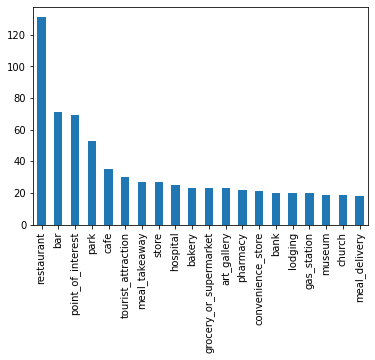

In [226]:
#visualization-1: this visualization lets us know which categories have more outlets available in the city, as we can see , restaurants are at the top of the list.
local_business['types'].value_counts()[:20].plot(kind='bar')

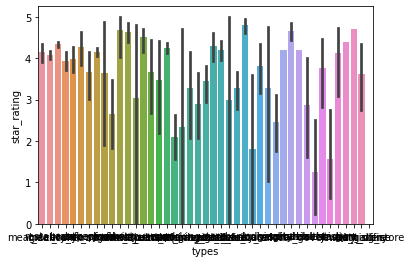

In [288]:
#Visualization-2 This graph will let us know how the type of business and the ratings are related, since the data is huge, the graph output is compressed.
import seaborn as sns

sns.barplot(x='types', y='star_rating', data=local_business, saturation=0.8)

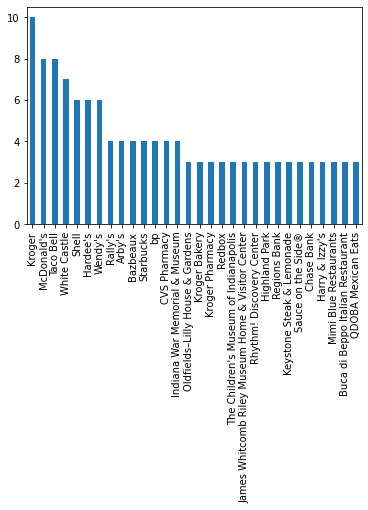

In [235]:
#visualization-3: This graph will let us know how many branches each establishment has in the downtown area.
local_business['place_name'].value_counts()[:30].plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e5b660810>],
      dtype=object)

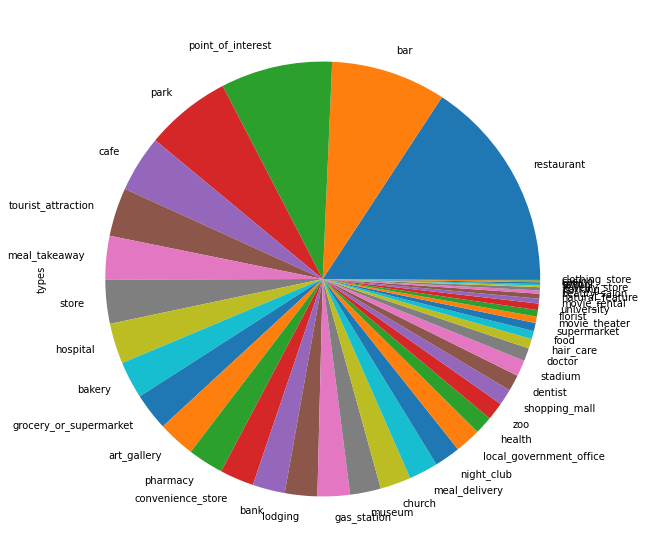

In [252]:
#visualization-4: This pie chart will show us the distribution of different types of establishments in the city.
local_business['types'].value_counts().plot(kind='pie',subplots=True , figsize=(20,10))

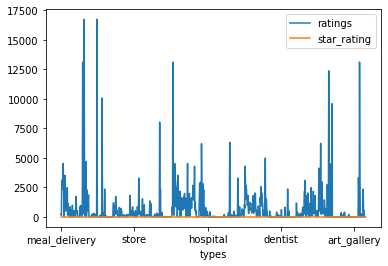

In [272]:
#visualization-5: This line chart will elt us know which type of establishment is receiving more ratings from the customers, 
#as we can see its meal_delivery which is getting the most number of ratings from the customers

local_business.plot(x="types", y=["ratings", "star_rating"])

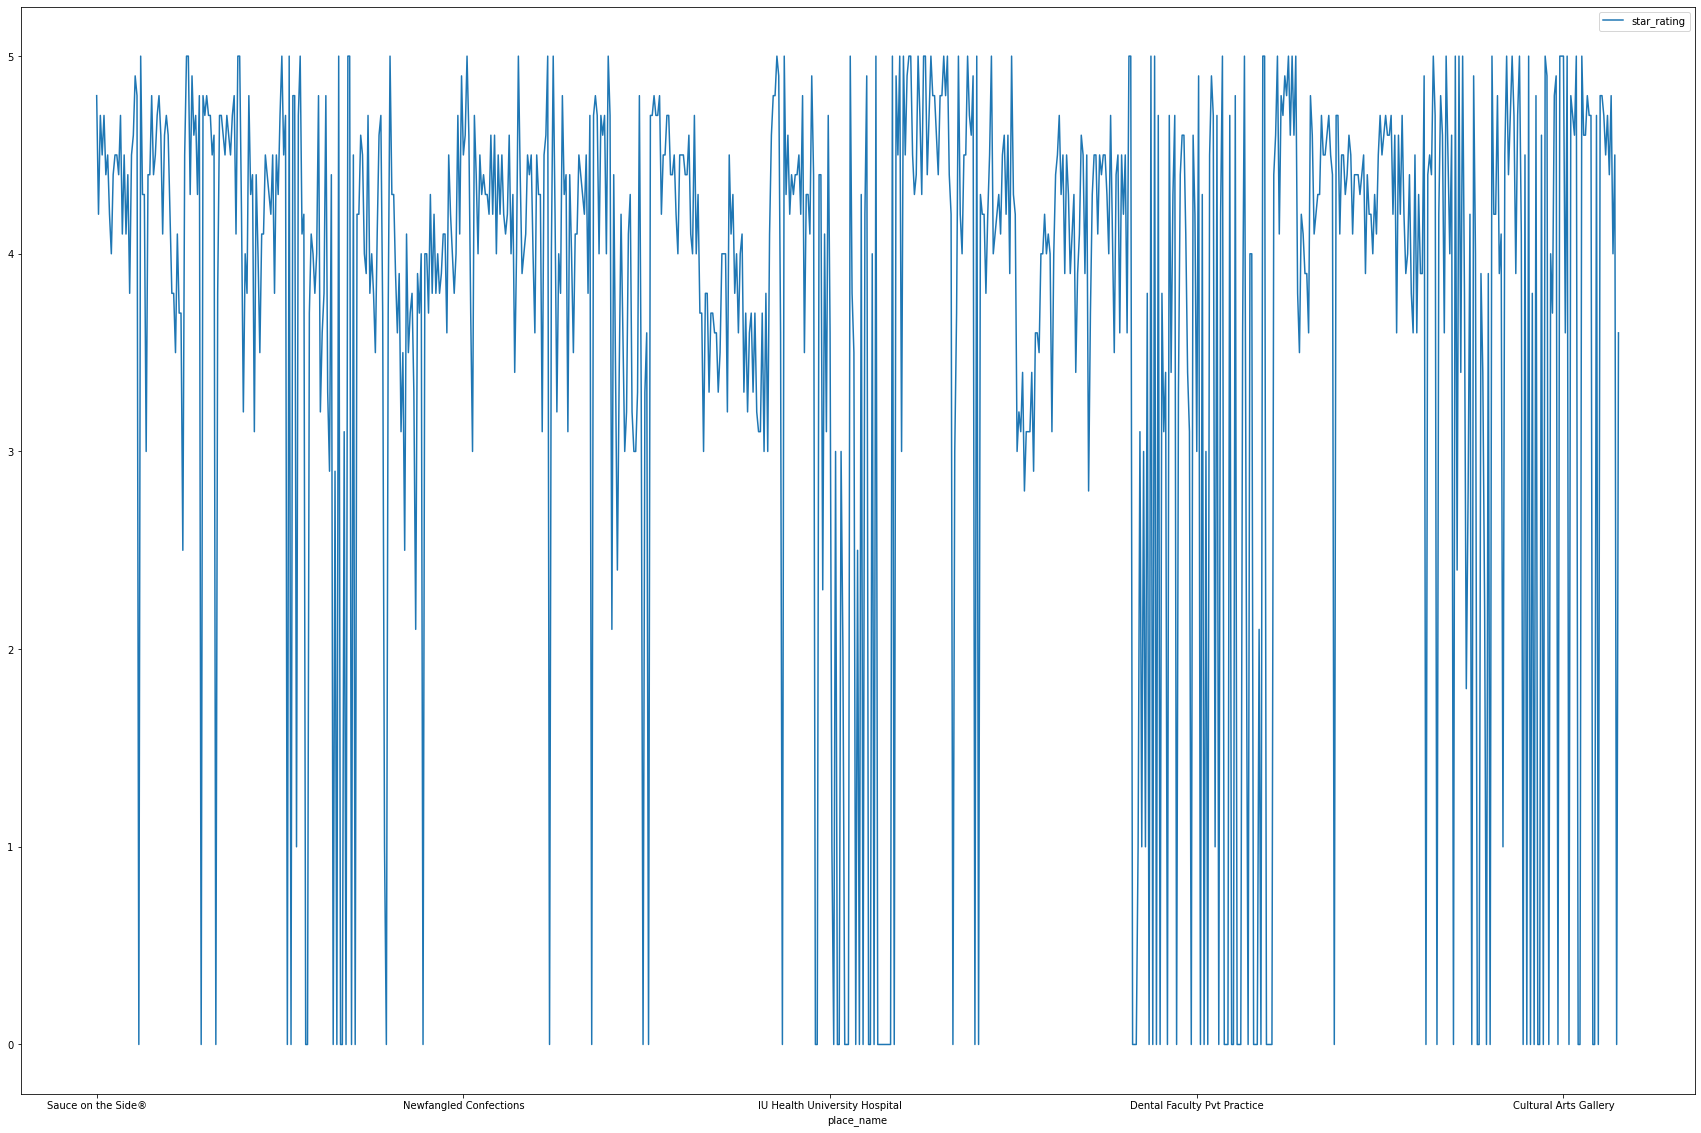

In [291]:
#visualization-6 This graph will show the relationship between the places and the ratings they are getting.
line_chart=local_business[['place_name','types','star_rating']].copy()
line_chart.plot(x='place_name',y='star_rating',figsize=(30,20))

In [297]:
#importing the day plan
day_plan=pd.read_csv('/content/Daily_Plan_Insights.csv')
day_plan

,Unnamed: 0,Place Name,Types,vicinity,star rating,Ratings,time,duration
0,71,Indianapolis Canal Walk,park,"Canal Walk, Indianapolis",4.7,2288,9:00 AM,1 hour
1,25,Quills Coffee,cafe,"941 N Meridian St, Indianapolis",4.6,544,10:00 AM,30 Minutes
2,460,Long's Bakery,bakery,"1453 N Tremont St, Indianapolis",4.8,6327,10:45 AM,30 Minutes
3,64,Indiana State Museum,museum,"650 W Washington St, Indianapolis",4.6,3338,11:30 AM,90 Minutes
4,112,Circle Centre Mall,shopping_mall,"49 W Maryland St, Indianapolis",4.1,10067,1:00 PM,3 hours
5,512,Taco Bell,restaurant,"49 W Maryland St, Indianapolis",3.6,303,4:00 PM,30 Minutes
6,67,Indiana War Memorial & Museum,tourist_attraction,"55 E Michigan St, Indianapolis",4.7,2371,4:45 PM,1 hour
7,61,White River State Park,tourist_attraction,"801 W Washington St, Indianapolis",4.7,4463,6:00 PM,1 hour
8,710,Fogo de Chão Brazilian Steakhouse,restaurant,"117 E Washington St, Indianapolis",4.6,6236,7:00 PM,2 hours
9,213,Kilroy's Bar & Grill,bar,"201 S Meridian St, Indianapolis",4.3,3291,9:00 PM,Night is still young


In [312]:
#print the day plan
day_plan.head()

,Unnamed: 0,Place Name,Types,vicinity,star rating,Ratings,time,duration
0,71,Indianapolis Canal Walk,park,"Canal Walk, Indianapolis",4.7,2288,9:00 AM,1 hour
1,25,Quills Coffee,cafe,"941 N Meridian St, Indianapolis",4.6,544,10:00 AM,30 Minutes
2,460,Long's Bakery,bakery,"1453 N Tremont St, Indianapolis",4.8,6327,10:45 AM,30 Minutes
3,64,Indiana State Museum,museum,"650 W Washington St, Indianapolis",4.6,3338,11:30 AM,90 Minutes
4,112,Circle Centre Mall,shopping_mall,"49 W Maryland St, Indianapolis",4.1,10067,1:00 PM,3 hours


In [313]:
#changing the column name
day_plan.rename(columns = {'vicinity':'address'}, inplace = True)

In [314]:
#printing the finalized day plan
day_plan

,Unnamed: 0,Place Name,Types,address,star rating,Ratings,time,duration
0,71,Indianapolis Canal Walk,park,"Canal Walk, Indianapolis",4.7,2288,9:00 AM,1 hour
1,25,Quills Coffee,cafe,"941 N Meridian St, Indianapolis",4.6,544,10:00 AM,30 Minutes
2,460,Long's Bakery,bakery,"1453 N Tremont St, Indianapolis",4.8,6327,10:45 AM,30 Minutes
3,64,Indiana State Museum,museum,"650 W Washington St, Indianapolis",4.6,3338,11:30 AM,90 Minutes
4,112,Circle Centre Mall,shopping_mall,"49 W Maryland St, Indianapolis",4.1,10067,1:00 PM,3 hours
5,512,Taco Bell,restaurant,"49 W Maryland St, Indianapolis",3.6,303,4:00 PM,30 Minutes
6,67,Indiana War Memorial & Museum,tourist_attraction,"55 E Michigan St, Indianapolis",4.7,2371,4:45 PM,1 hour
7,61,White River State Park,tourist_attraction,"801 W Washington St, Indianapolis",4.7,4463,6:00 PM,1 hour
8,710,Fogo de Chão Brazilian Steakhouse,restaurant,"117 E Washington St, Indianapolis",4.6,6236,7:00 PM,2 hours
9,213,Kilroy's Bar & Grill,bar,"201 S Meridian St, Indianapolis",4.3,3291,9:00 PM,Night is still young


Data Science Work Sample Assessment, Xtern, October 2022.

Data Analysis part: 

The Work Sample Assessment requires an analysis of local businesses in and around Indianapolis and the data should be gathered from APIs like Google Maps API or OpenSourceMaps API(OSM). Keeping this in mind, I started the data collection part. After several hours of research, I started working on Google Maps API. The API is very intuitive to use and has a lot of potential to answer a lot of questions related to the topic given in the WSA. The data collection part was fun, during the process of fine tuning the code to collect the data, a lot of questions sparked my mind and I knew exactly how to answer each question that came to my mind. The first hurdle I faced was how to analyze the data once it was cleaned, I was looking for an efficient way to do it with simple terminologies and effective outputs. I then redirected my mind to Spark which is very useful in processing large amounts of data. I specifically chose Spark SQL which has the ability to use the data frames created from the API and to run SQL queries on them to analyze the data and provide the answers to all the questions that came to my mind so far.
Data collection and Data Cleaning: 
  The Google Maps API is a powerful tool that helps us in creating a link between python and the Google maps application. First, I thought of collecting the data related to stores in and around Indy, within a radius range of 5000 meters so that I can cover the entire downtown area and some other areas around the city. Keeping this in mind, I moved ahead and started jotting down the keywords, after scrutinizing and filtering, I finally came up with a list of 59 entities which are used as the keywords while searching the map. These keywords are dynamically populated, and the URL will be  executed until all the keywords are covered. The code is written in such a way that every time when the URL is executed, a request would be sent to the server with all the necessary details related to our search query and a JSON response would be returned from the server to the user. This response is captured and then processed further to match our requirements.

Once the data is collected and cleaned, I used the clean data and then transferred it into a dataframe and saved it as a CSV file. This CSV file is used later to populate the SQL database I created using spark.

Dataset Description: The dataset collected has nearly 830 rows and 10 columns with place_id,place_name,latitude,longitude,type of the establishment, star ratings, total ratings,address etc., as attributes. Out of these attributes I filtered some unnecessary columns and created a clean dataset which is used to run the SQL queries.

SQL Queries:
The data analysis is done in such a way that if a tourist comes to Indianapolis for a day, what can they do to cover most of the interesting stuff in town and that started the analysis of the data.
Queries were written to get info about the best places to do morning walks and we found out that the canal walk would be better based on the user ratings available, then after some walking, they can grab a cup of coffee nearby at Quills coffee and a small walk later, they can go to Long's bakery to get a nice donut treat and then once the stomach is filled and the soul is satisfied, they can visit the Indiana State museum which is a humble abode for a lot of artifacts that represent American culture. They can spend some quality time and they can head to the Circle Center Mall where they can visit and shop a lot in the stores available. If feeling peckish, they can reach out to the nearest Taco Bell or Burger King inside the mall and satisfy their hunger with a small yet filling snack. After spending a good 3-4 hours at the Circle Center Mall, they can head to the Indiana War Memorial before it closes, they can spend one hour there visiting and they can head over to the white river state park to enjoy a beautiful sunset . After sunset, they can head to the Brazillian Steakhouse for a delicious  dinner and after the dinner, they can go to a sports bar to enjoy a nice evening(not encouraging drinking alcohol though).

As you can see, the analysis is done keeping a normal man in mind and the results are obatained in such a way that they would cater to their doubts if it's their first time in Indianapolis.

Furthermore, more analysis is done to get additional information related to pharmacies, hospitals, banks and other establishments .

Coming to the visualizations, as most of the questions are answered by the SQL queries, the visualizations play an important role in explaining things which were missed by the SQL Queries. These graphs clearly show us that restaurants are the most popular businesses as they have more outlets, Kroger is the business which has more branches and meal_takeaways are getting more and better reviews.

A Day plan has been designed according to the results of the SQL queries and keeping all conditions in mind. The Day plan has been uploaded and you can see it in the last cell of the notebook.

